PySpark tutorial for beginers

This notebook is a part of my learning journey which I've been documenting from Udacity's Data Scientist Nanodegree program, which
helped me a lot to learn and excel advanced data science stuff such as PySpark. Thank you so much Udacity for providing such quality
content.

Spark is a big data framework which contains libraries for data analysis, machine learning, graph analisis, and streaming live data. Spark
is generally faster than Hadoop. This is because Hadoop writes intermidiate results to disk whereas Spark tries to keep intermediate
results in memory whenever possible.

The Hadoop ecosystem includes a distributed file storage system called HDFS (Hadoop Distributed File System). Spark, on the other
hand, does not include a file storage system. You can use Spark on top of HDFS, but you do not have to. Spark can read in data from
other sources as well such as Amazon S3.

Spark doesn't implement MapReduce, you can write Spark programs that behave in a similar way to the map-reduce pattern.

Limitations of Spark:

    - Spark Streaming's latency is at least 500 milliseconds since it operates on micro-batches of records, instead of processing one
    record at a time. Native streaming tools such as Storm, Apex, of Flink can push down this latency value and might be more suitable
    for low-latency applications. Flink and Apex can be used for batch computation as well, so if you're already using them for stream
    processing, there's no need to ass Spark to your stack of technologies.
    
    - Another limitation of Spark is its selection of machine learning algorithms. Currently, Spark only supports algorithms that scale
    linerly with the input data size. In general, deep learning is not available either, though there are many projects integrate Spark
    with Tensorflow and other deep learning tools.
   
Source: - Spark and PySpark documentation 

In [1]:
import os

for dirname, _, filenames in os.walk(os.getcwd() + "\input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\00.bigdata\src\log_analysis\log_analysis\input\sparkify_log_small.json


Maps

Maps take data as input and then transform that data with whatever function you put in the map. They are like directions for the data
telling how each input should get to the output.

First, we need to create a SparkContext object. With the SparkContext, you can input a dataset and parallelize the data across a cluster.

In [2]:
# !pip install pyspark

In [3]:
import pyspark

sc = pyspark.SparkContext(appName="intro_to_spark")
log_of_songs = [
        "Despacito",
        "Nice for what",
        "No tears left to cry",
        "Despacito",
        "Havana",
        "In my feelings",
        "Nice for what",
        "despacito",
        "All the stars"
]

# parallelize the log_of_songs to use with Spark
distributed_song_log = sc.parallelize(log_of_songs)

In [4]:
def convert_song_to_lowercase(song):
    return song.lower()

map step will go through each song in the list and apply the convert_song_to_lowercase() function

In [5]:
# distributed_song_log.map(convert_song_to_lowercase)

You'll notice that this code cell ran quite quickly. This is because of lazy evaluation. Spark does not actually execute the map step unless
it need to.

"RDD" in the output refers to resilient distributed dataset. RDDs are exactly what they say they are: fault-tolerant datasets distributed
across a cluster. This is how Spark stores data.

To get Spark to actually run the map step, you need to use an "action". One available action is the collect method. The collect() method
takes the results from all of the clusters and "collects" them into a single list on the master node.

In [6]:
# distributed_song_log.map(convert_song_to_lowercase).collect()

Note as well that Spark is not changing the original data set: Spark is merely making a copy. You can see this by running collect() on the
original dataset.

In [7]:
distributed_song_log.collect()

['Despacito',
 'Nice for what',
 'No tears left to cry',
 'Despacito',
 'Havana',
 'In my feelings',
 'Nice for what',
 'despacito',
 'All the stars']

Reading and Writing Data with Spark

In [8]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession \
    .builder \
    .appName("intro_to_spark").getOrCreate()

In [10]:
spark.sparkContext.getConf().getAll()

[('spark.app.startTime', '1727936585418'),
 ('spark.eventLog.enabled', 'true'),
 ('spark.history.fs.logDirectory', 'file:///c:/logs/path'),
 ('spark.app.submitTime', '1727936585170'),
 ('spark.app.id', 'local-1727936586978'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED 

In [11]:
spark

Now, let's create our first dataframe from a small sample data set which is a log file data set that describes user interactions with a
music streaming service. The records describe events such as logging in to the site, visiting a page, listening to the next song, seeing an
ad.

In [12]:
path = "input\sparkify_log_small.json"
user_log = spark.read.json(path)

In [13]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [14]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [15]:
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [16]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

Now let's save this as a csv file

In [17]:
# out_path = "sparkify_log_small.csv"
# user_log.write.mode("overwrite").save(out_path, format="csv", header=True)

Data exploration

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import desc, asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

path = "input\sparkify_log_small.json"
user_log = spark.read.json(path)

user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [19]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [20]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [21]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [22]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [23]:
user_log.count()

10000

In [24]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [25]:
user_log.select(["userId", "firstName", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstName='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstName='Kenneth', page='Home', song=None),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstName='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstName='Kenneth'

Calculating Statistics by Hour

In [26]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

In [27]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [28]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='5')

In [30]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  430|
|   1|  362|
|   2|  295|
|   3|  257|
|   4|  248|
|   5|  369|
|   6|  375|
|   7|  456|
|   8|  454|
|   9|  382|
|  10|  302|
|  11|  352|
|  12|  276|
|  13|  348|
|  14|  358|
|  15|  375|
|  16|  249|
|  17|  216|
|  18|  228|
|  19|  251|
+----+-----+
only showing top 20 rows



Text(0, 0.5, 'Song played')

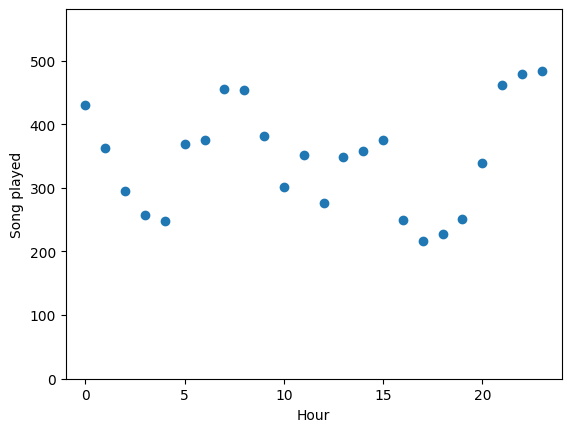

In [32]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24)
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Song played")

Drop Rows with Missing Values

In [33]:
user_log_valid = user_log.dropna(how= "any", subset= ["userId", "sessionId"])

In [34]:
user_log_valid.count()

10000

In [35]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [36]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [37]:
user_log_valid.count()

9664

Users Downgrade Their Accounts

Let's find when users downgrade their accounts and then flag those log entries.

In [38]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  NULL|Logged In|    Kelly|     F|           24|  Newton|  NULL| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|NULL|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  18|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [40]:
user_log.select(["userId", "firstName", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstName='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [41]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [42]:
user_log_valid = user_log_valid.withColumn("downgrade", flag_downgrade_event("page"))

In [43]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='5', downgrade=0)

In [45]:
from pyspark.sql import Window

In [46]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [47]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgrade").over(windowval))

In [48]:
user_log_valid.select(["userId", "firstName", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstName='Kelly', ts=1513833144284, page='NextSong', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513821430284, page='Home', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513814880284, page='NextSong', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513768456284, page='Home', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513768454284, page='Submit Downgrade', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768453284, page='Downgrade', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768452284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768242284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768012284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513767643284, page='NextSong', level='paid', phase=1),
 Row(userId='1138',